In [1]:
%reset -f

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Dependencies
import json
import requests
from config_api import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [2]:
# # Save config information
# url = "http://api.openweathermap.org/data/2.5/weather?"
# city = "London"

# # Build query URL
# query_url = url + "appid=" + api_key + "&q=" + city

# # Get weather data
# weather_response = requests.get(query_url)
# weather_json = weather_response.json()

# # Get the temperature from the response
# # display(f"The weather API responded with: {weather_json}.")
# # weather_json

## WeatherPy
In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a simple Python library, the OpenWeatherMap API, and a little common sense to create a representative model of weather across world cities.
Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

Create a new GitHub repository for this project called API-Challenge (note the kebab-case). Do not add to an existing repo

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
* See Example Solution for a reference on expected format.

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

644

In [3]:


# Get the temperature from the response
# display(f"The weather API responded with: {weather_json}.")
# weather_json
# print(list(w_dict),'\n\n')
# for i in w_dict:
    
#     for j in 

def extract_info_from_dictionary(api_dict):

    cols = []
    vals = []

    for i in api_dict:
        #print('\n\n-- ',i,' -- ',len(i),' -- ',api_dict[i])
        #print(isinstance(api_dict[i],dict))
        base_col = i

        if isinstance(api_dict[i],dict):
            #print('**TRUE**')
            for j in api_dict[i]:
                #print('-- ',j)#,' -- ',len(i),' -- ',api_dict[i])
                cols.append(base_col+'_'+j)
                vals.append(api_dict[i][j])
        elif isinstance(api_dict[i],list):
            #print('**TRUE**')
            for j in api_dict[i][0]:
                #print('-- ',base_col+'_'+j)#,' -- ',len(i),' -- ',api_dict[i])
                cols.append(base_col+'_'+j)
                #print(api_dict[i][0][j])
                vals.append(api_dict[i][0][j])
        else:
            #pass
            #print('**',i)
            cols.append(base_col)
            vals.append(api_dict[i])
            
    return [cols,vals]

###

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"

# cities = cities[:10]
frames = []
for city in cities:

    t = time.process_time()

    
    # Build query URL
    query_url = url + "appid=" + api_key + "&q=" + city

    # Get weather data
    weather_response = requests.get(query_url)
    w_dict = weather_response.json()

    data = extract_info_from_dictionary(w_dict)
    df = pd.DataFrame(data)
    df.columns = df.iloc[0]
    df = df.iloc[1:]

    frames.append(df)
    
    #do some stuff
    elapsed_time = time.process_time() - t
    print(elapsed_time)

###

df1 = pd.concat(frames,sort=False)
df1

0.01730999999999927
0.014403999999999861
0.013569999999999638
0.010373999999999661
0.013802000000000092
0.015190000000000481
0.015538000000000274
0.016378000000000448
0.01221400000000017
0.01730399999999932
0.013029999999999653
0.013279999999999959
0.01285400000000081
0.013062000000000573
0.011061999999999905
0.015503999999999962


KeyboardInterrupt: 

In [12]:
# # col
# # vals

# pd.concat(frames)

# t = time.process_time()
# #do some stuff
# elapsed_time = time.process_time() - t


df1['cities'] = cities

import datetime as dt

now = dt.datetime.now()
now = str(now).split(' ')[0]
df1.to_csv(now+'weather_data_from_api.csv')

df1.count()

coord_lon              557
coord_lat              557
weather_id             557
weather_main           557
weather_description    557
weather_icon           557
base                   557
main_temp              557
main_pressure          557
main_humidity          557
main_temp_min          557
main_temp_max          557
visibility             220
wind_speed             557
wind_deg               543
clouds_all             557
dt                     557
sys_type               265
sys_id                 265
sys_message            557
sys_country            557
sys_sunrise            557
sys_sunset             557
timezone               557
id                     557
name                   557
cod                    625
main_sea_level         292
main_grnd_level        292
rain_1h                  7
wind_gust               36
message                 68
rain_3h                 89
snow_3h                  1
cities                 625
dtype: int64

In [13]:

# df1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
## see above

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
## see above

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [22]:
print([i for i in list(df1) if 'temp' in i])
print([i for i in list(df1) if 'lat' in i])

df1.dtypes

# df1.loc[df1['']]

pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)

df2 = df1.loc[df1['cod']==200]
len(df2)

df2.count()

['main_temp', 'main_temp_min', 'main_temp_max']
['coord_lat']


coord_lon              557
coord_lat              557
weather_id             557
weather_main           557
weather_description    557
weather_icon           557
base                   557
main_temp              557
main_pressure          557
main_humidity          557
main_temp_min          557
main_temp_max          557
visibility             220
wind_speed             557
wind_deg               543
clouds_all             557
dt                     557
sys_type               265
sys_id                 265
sys_message            557
sys_country            557
sys_sunrise            557
sys_sunset             557
timezone               557
id                     557
name                   557
cod                    557
main_sea_level         292
main_grnd_level        292
rain_1h                  7
wind_gust               36
message                  0
rain_3h                 89
snow_3h                  1
cities                 557
dtype: int64

/Users/williamwright/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/williamwright/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with 

Text(0.5, 1.0, 'coord_lat vs. main_temp Plot (1970-01-01)')

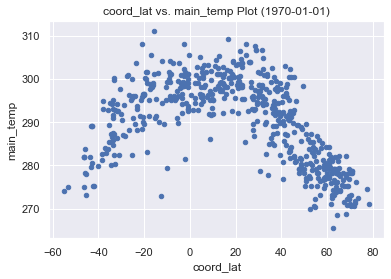

In [40]:
import seaborn as sns
sns.set()

# df2.plot(type='scatter',x=df2['coord_lat'],y=df2['main_temp'])
df2['coord_lat'] = df2['coord_lat'].astype(float)
# df2['main_temp'] = df2['main_temp'].astype(float)
# df2.plot.scatter(x='coord_lat',y='main_temp')

metric = 'main_temp'
df2[metric] = df2[metric].astype(float)
df2.plot.scatter(x='coord_lat',y=metric)
plt.title('coord_lat vs. '+metric+' Plot (1970-01-01)')

#### Latitude vs. Humidity Plot

/Users/williamwright/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'coord_lat vs. main_humidity Plot (1970-01-01)')

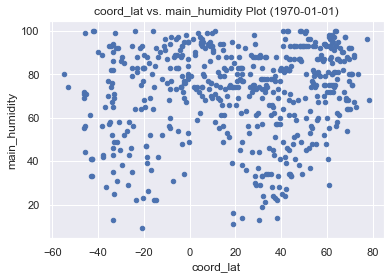

In [39]:
# df2['main_humidity'] = df2['main_humidity'].astype(float)
# df2.plot.scatter(x='coord_lat',y='main_humidity')

metric = 'main_humidity'
df2[metric] = df2[metric].astype(float)
df2.plot.scatter(x='coord_lat',y=metric)
plt.title('coord_lat vs. '+metric+' Plot (1970-01-01)')

#### Latitude vs. Cloudiness Plot

/Users/williamwright/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'coord_lat vs. clouds_all Plot (1970-01-01)')

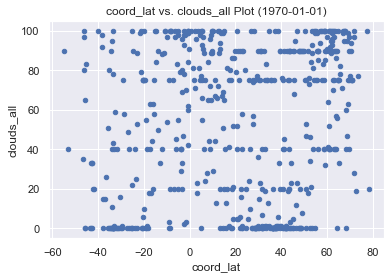

In [38]:
# df2['clouds_all'] = df2['clouds_all'].astype(float)
# df2.plot.scatter(x='coord_lat',y='clouds_all')

metric = 'clouds_all'
df2[metric] = df2[metric].astype(float)
df2.plot.scatter(x='coord_lat',y=metric)
plt.title('coord_lat vs. '+metric+' Plot (1970-01-01)')

#### Latitude vs. Wind Speed Plot

/Users/williamwright/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Latitude vs. wind_speed Plot (1970-01-01)')

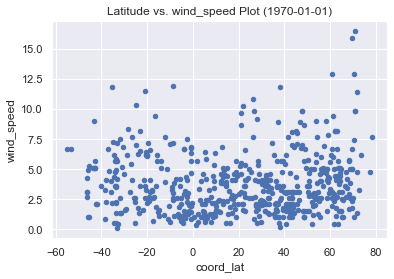

In [37]:
metric = 'wind_speed'
df2[metric] = df2[metric].astype(float)
df2.plot.scatter(x='coord_lat',y=metric)
plt.title('coord_lat vs. '+metric+' Plot (1970-01-01)')

In [35]:
# df2['dt']= pd.to_datetime(df['dt'])
pd.to_datetime(df2['dt'])
df2['dt'].astype('datetime64[ns]') 

1   1970-01-01 00:00:01.569906460
1   1970-01-01 00:00:01.569906460
1   1970-01-01 00:00:01.569906461
1   1970-01-01 00:00:01.569906461
1   1970-01-01 00:00:01.569906462
                 ...             
1   1970-01-01 00:00:01.569906679
1   1970-01-01 00:00:01.569906679
1   1970-01-01 00:00:01.569906680
1   1970-01-01 00:00:01.569906680
1   1970-01-01 00:00:01.569906680
Name: dt, Length: 557, dtype: datetime64[ns]

#### Your next objective is to run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

/Users/williamwright/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


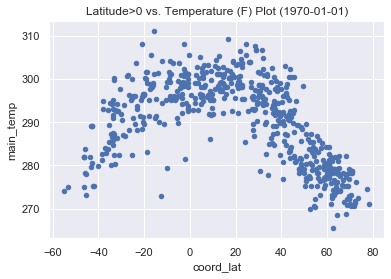

/Users/williamwright/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


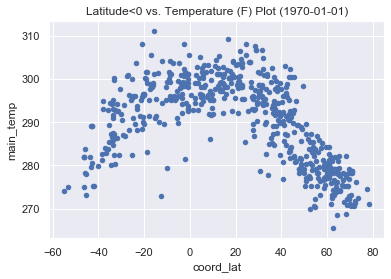

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


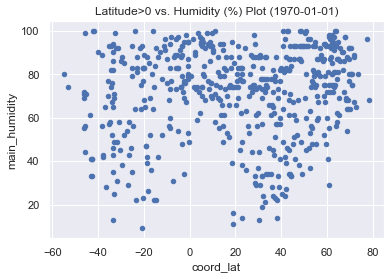

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


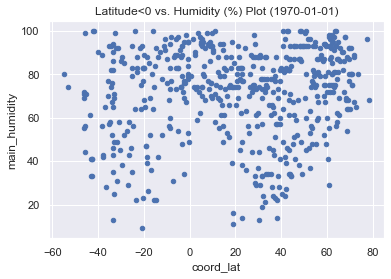

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


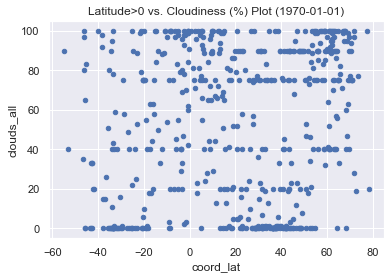

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


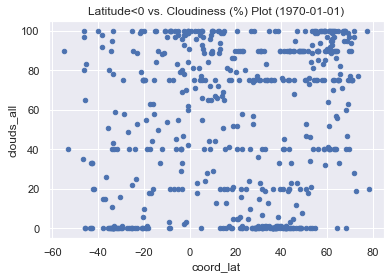

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


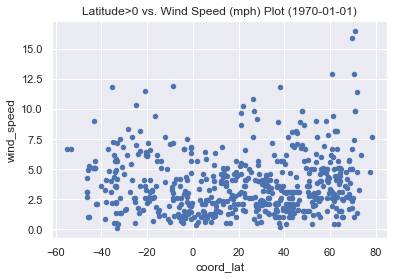

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


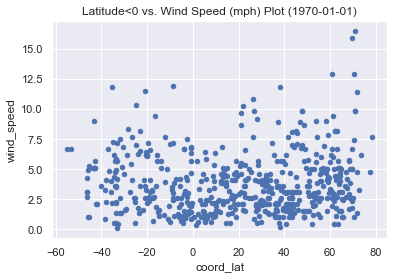

In [57]:
# import warnings
# # import SettingWithCopyWarning from warnings
# warnings.filterwarnings('ignore','single numeric RGB')#,category=SettingWithCopyWarning)


def plot_vs_coord_latN(df,metric,metric_label):
    # metric = 'wind_speed'
    df2[metric] = df2[metric].astype(float)
    df2.plot.scatter(x='coord_lat',y=metric)
    plt.title('Latitude>0 vs. '+metric_label+' Plot (1970-01-01)')
    return plt.show()

def plot_vs_coord_latS(df,metric,metric_label):
    # metric = 'wind_speed'
    df2[metric] = df2[metric].astype(float)
    df2.plot.scatter(x='coord_lat',y=metric)
    plt.title('Latitude<0 vs. '+metric_label+' Plot (1970-01-01)')
    return plt.show()

###

df3 = df2.loc[df2['coord_lat']>0] # Northern Hemisphere
df4 = df2.loc[df2['coord_lat']<0] # Southern Hemisphere

metric_labels = ['Temperature (F)','Humidity (%)','Cloudiness (%)','Wind Speed (mph)']
metrics = ['main_temp','main_humidity','clouds_all','wind_speed']

for i in range(0,len(metrics)):
    
    metric = metrics[i]
    metric_label = metric_labels[i]
    
    plot_vs_coord_latN(df3,metric,metric_label)
    plot_vs_coord_latS(df4,metric,metric_label)

In [58]:
# df3 = df2.loc[df2['coord_lat']>0] # Northern Hemisphere
# df4 = df2.loc[df2['coord_lat']<0] # Southern Hemisphere

